In [20]:
import numpy as np
import pandas as pd

In [21]:
#Import dataset
df = pd.read_csv("D:/New folder/Mall_Customers.csv")

In [22]:
#Shape of the dataset (rows, columns)
print(df.shape)

(200, 5)


In [23]:
#Columns names
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [24]:
#First 5 Rows
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
#Check for Null Values
print(df.isnull().sum()) 

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [26]:
# Basic info
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
#Basic Description
print("Basic Description:")
print(df.describe())

Basic Description:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

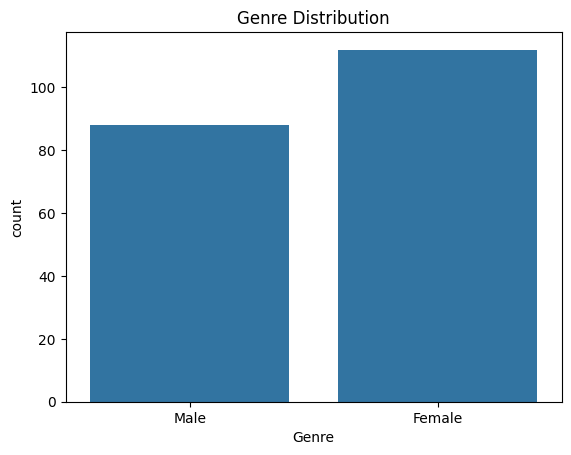

In [30]:
# Distribution of Genre
sns.countplot(x="Genre", data=df)
plt.title("Genre Distribution")
plt.show()

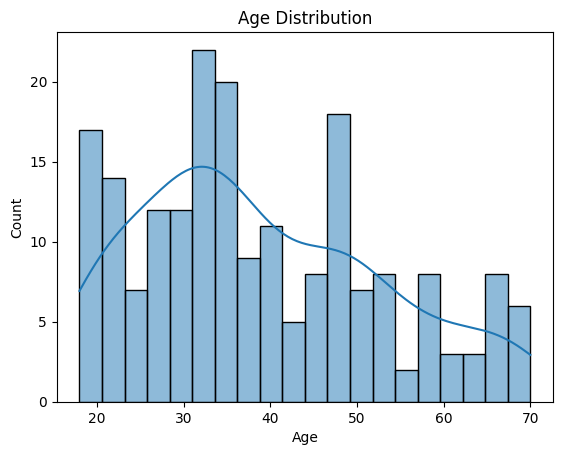

In [31]:
# Age distribution
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

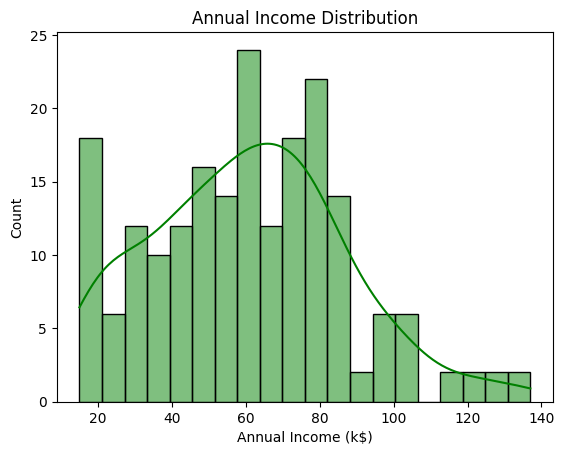

In [32]:
# Annual Income distribution
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color='green')
plt.title("Annual Income Distribution")
plt.show()

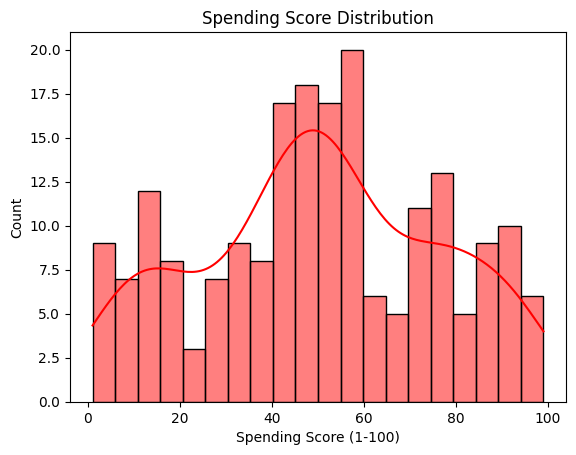

In [33]:
# Spending Score distribution
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color='red')
plt.title("Spending Score Distribution")
plt.show()

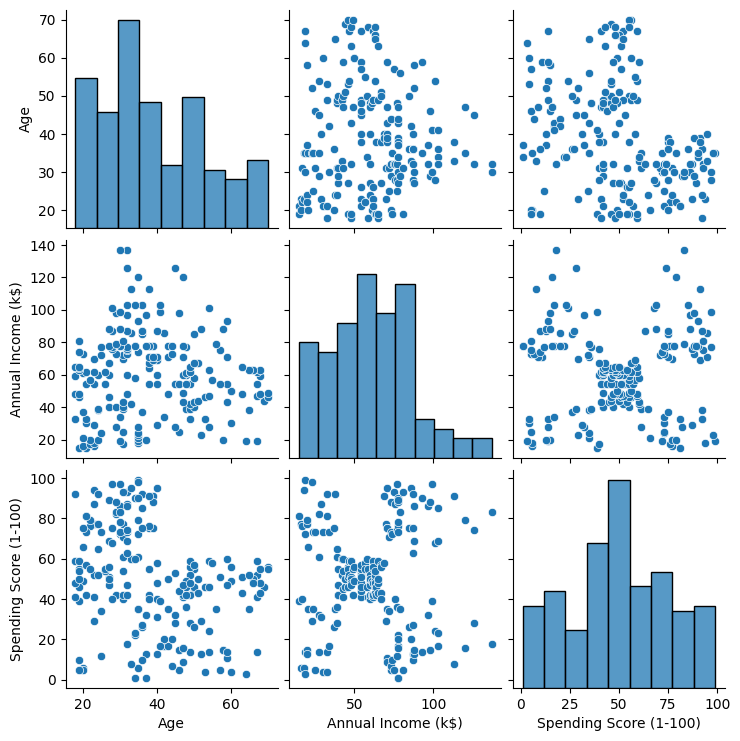

In [34]:
# Pairplot
sns.pairplot(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])
plt.show()

In [35]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
from sklearn.cluster import KMeans

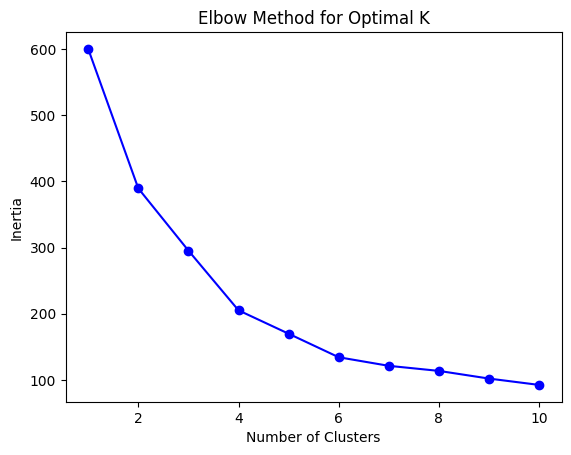

In [40]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [41]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [42]:
from sklearn.decomposition import PCA

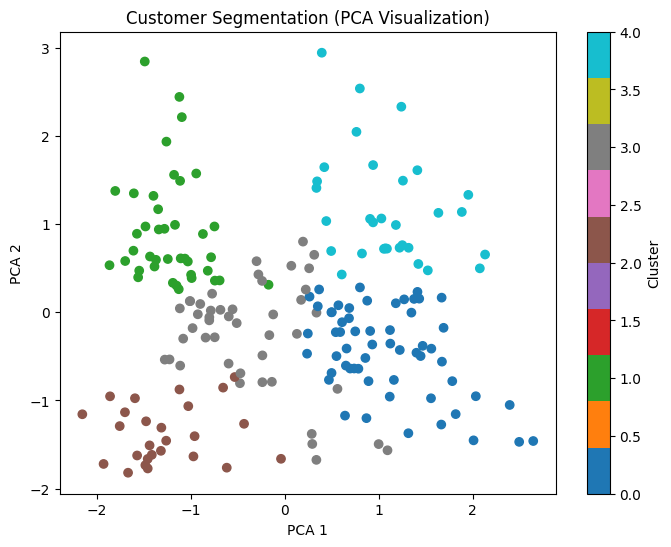

In [43]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='tab10')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segmentation (PCA Visualization)')
plt.colorbar(label='Cluster')
plt.show()

In [44]:
cluster_summary = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


In [46]:
for cluster, row in cluster_summary.iterrows():
    print(f"\nCluster {cluster} Strategy:")

    if row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] > 60:
        print("- High income, high spenders → Premium membership, luxury promotions.")
    elif row['Annual Income (k$)'] > 70 and row['Spending Score (1-100)'] < 40:
        print("- High income, low spenders → Personalized offers to increase spending.")
    elif row['Annual Income (k$)'] < 40 and row['Spending Score (1-100)'] > 60:
        print("- Low income, high spenders → Budget-friendly promotions, discounts.")
    elif row['Age'] < 30 and row['Spending Score (1-100)'] > 50:
        print("- Young, active spenders → Trendy and lifestyle-focused marketing.")
    else:
        print("- Older/average customers → Retention strategies, loyalty rewards.")



Cluster 0 Strategy:
- Older/average customers → Retention strategies, loyalty rewards.

Cluster 1 Strategy:
- High income, high spenders → Premium membership, luxury promotions.

Cluster 2 Strategy:
- Low income, high spenders → Budget-friendly promotions, discounts.

Cluster 3 Strategy:
- Older/average customers → Retention strategies, loyalty rewards.

Cluster 4 Strategy:
- High income, low spenders → Personalized offers to increase spending.
